# __INFO 2950 Final Project - Data Cleaning__

# __DATA CLEANING__:



### Introduction to the Raw Dataset

We chose a data table showing clinical data for 2,509 breast cancer patients, including Patient ID, Number of Postive Lymphnodes (numerical), Nottingham Prognostic Index (numerical), Cellularity/Tumor Content (categorical), Chemotherapy (binary), Cohort, ER Status measured by IHC (binary), HER2 Status measured by SNP6 (categorical), Hormone Therapy (binary), Inferred Menopausal State (binary), Sex (binary), Integrative Cluster (categorical/numerical), Age at Diagnosis (numerical), Overall Survival in Months since Initial Diagonosis (numerical), Overall Patient Survival Status (binary), Pam50 + Claudin-Low Subtype (categorical), 3-Gene Classifier Subtype (categorical), Patient's Vital Status (categorical), Primary Tumor Laterality (binary), Radio Therapy (binary), Tumor Other Histologic Subtype (categorical), Type of Breast Surgery (categorical), Relapse Free Status (binary), and Relapse Free Status in months (numerical).

Source for Patient Clinical Data: https://www.cbioportal.org/study/summary?id=brca_metabric

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Data Cleaning

For this project, our group use the dataset about breast cancer patient clinal and biological data to predict the vitality of patient.


Load in `breast_cancer_data.csv` with `pandas`. We name the dataframe as `breast_cancer_df`. We need to separate the columns by using delimiter = ";"


In [2]:
#Read the CSV with semicolon delimiter
breast_cancer_df = pd.read_csv("breast_cancer_data.csv", delimiter=';')
#Print the shape of the dataframe  
print(breast_cancer_df.shape) 
#Display the first ten rows of the dataframe
breast_cancer_df.head(10)

(1985, 22)


,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
0,1,10.0,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,140.500000,0:LIVING,claudin-low,Living,Right,YES,Ductal/NST,MASTECTOMY,0:Not Recurred,138.65
1,2,0.0,4.020,High,NO,1,Positve,NEUTRAL,YES,Pre,...,84.633333,0:LIVING,LumA,Living,Right,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,83.52
2,3,1.0,4.030,High,YES,1,Positve,NEUTRAL,YES,Pre,...,163.700000,1:DECEASED,LumB,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY,1:Recurred,151.28
3,4,3.0,4.050,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,...,164.933333,0:LIVING,LumB,Living,Right,YES,Mixed,MASTECTOMY,0:Not Recurred,162.76
4,5,8.0,6.080,High,YES,1,Positve,NEUTRAL,YES,Post,...,41.366667,1:DECEASED,LumB,Died of Disease,Right,YES,Mixed,MASTECTOMY,1:Recurred,18.55
5,6,0.0,4.062,Moderate,NO,1,Positve,NEUTRAL,YES,Post,...,7.800000,1:DECEASED,LumB,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY,1:Recurred,2.89
6,7,1.0,4.020,Moderate,YES,1,Positve,LOSS,YES,Post,...,164.333333,0:LIVING,LumB,Living,Right,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,162.17
7,8,NaN,6.130,High,YES,1,Negative,NEUTRAL,NO,Post,...,22.400000,1:DECEASED,Normal,Died of Disease,Left,YES,Lobular,MASTECTOMY,1:Recurred,11.74
8,9,1.0,4.058,Moderate,NO,1,Positve,NEUTRAL,YES,Post,...,99.533333,1:DECEASED,claudin-low,Died of Other Causes,Left,YES,Mixed,BREAST CONSERVING,0:Not Recurred,98.22
9,10,11.0,6.680,NaN,NaN,1,Positve,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Ductal/NST,NaN,1:Recurred,126.32


Note: Due to the wide format of the DataFrame with 22 columns, the output is truncated. The displayed rows and columns offer a glimpse of the data.

PATIENT_ID column show the unique identifier for each patient. We have made the decision to drop the 'PATIENT_ID' column, as it serves as a unique identifier and does not contribute to the analysis of breast cancer outcomes.

In [3]:
#Drop the 'PATIENT_ID' column
breast_cancer_df = breast_cancer_df.drop(columns=['PATIENT_ID'])

Since breast cancer predominantly affects individuals who identify as female, we have made the decision to remove the 'SEX' column from the dataset. Since all entries pertain to 'female,' this column does not provide additional discriminatory information.

In [4]:
#Drop the 'SEX' column
breast_cancer_df = breast_cancer_df.drop(columns=['SEX'])

Since the dataset is from breast cancer patient diagnose, some patients choose not to take all the diagnose that will lead to the missing data. We have initiated a thorough examination of the dataset to identify any columns with a substantial number of missing values that could potentially affect the dataset's performance. To achieve this, we executed the following code to count the number of empty values in each column

In [5]:
#Count the number of empty values in each columns:
breast_cancer_df.isna().sum()

LYMPH_NODES_EXAMINED_POSITIVE     76
NPI                                1
CELLULARITY                       68
CHEMOTHERAPY                       5
COHORT                             0
ER_IHC                            43
HER2_SNP6                          5
HORMONE_THERAPY                    5
INFERRED_MENOPAUSAL_STATE          5
AGE_AT_DIAGNOSIS                   0
OS_MONTHS                          4
OS_STATUS                          4
CLAUDIN_SUBTYPE                    5
VITAL_STATUS                       5
LATERALITY                       115
RADIO_THERAPY                      5
HISTOLOGICAL_SUBTYPE              46
BREAST_SURGERY                    30
RFS_STATUS                         1
RFS_MONTHS                         0
dtype: int64

Our research question primarily centers around predicting patient survival (VITAL_STATUS). Thus, we have decided to focus exclusively on breast cancer patients who are either still living or have tragically passed away due to breast cancer. The 'VITAL_STATUS' column in our dataset contains four distinct values: 'Living,' 'Died of Disease,' 'Died of Other Causes,' and missing values (NaN).

To ensure the dataset's integrity and alignment with our research objective, we have removed rows that contain missing values in the 'VITAL_STATUS' column and those where 'VITAL_STATUS' is listed as 'Died of Other Causes.' This step was carried out as follows

In [6]:
#Drop the rows that have VITAL_STATUS column missing value
breast_cancer_df = breast_cancer_df.dropna(subset=['VITAL_STATUS'])
#Drop rows where VITAL_STATUS is "Died of Other Causes"
breast_cancer_df = breast_cancer_df[breast_cancer_df
['VITAL_STATUS']!='Died of Other Causes']

In our comprehensive data exploration, we identified that the top three columns with missing values are 'LATERALITY,' 'LYMPH_NODES_EXAMINED_POSITIVE,' and 'CELLULARITY.' While these columns exhibit missing values, the number of missing entries is relatively small in comparison to the total data points within each column. However, since 'LATERALITY' and 'CELLULARITY' are categorical variables, and 'LATERALITY' holds the highest count of missing values, we have decided not to perform data imputation but rather remove rows containing NaN values in these columns.

'LATERALITY' primarily indicates whether cancer is present in the left or right breast. However, given that our dataset solely comprises breast cancer patients, the specific breast where cancer occurs does not significantly impact our research question regarding variables affecting patient vitality. Consequently, we have opted to drop rows with missing values in the 'LATERALITY' column:

In [7]:
#Drop the rows that have LATERALITY column missing value
breast_cancer_df = breast_cancer_df.dropna(subset=['LATERALITY'])

Similarly, 'CELLULARITY' pertains to the density or concentration of tumor cells within a tissue or sample, categorized into 'High,' 'Medium,' and 'Low' levels. We have chosen not to replace missing values with the mean or median, as these may inadvertently introduce bias into the dataset. Therefore, we have elected to remove rows with missing 'CELLULARITY' values:

In [8]:
#Drop the rows that have CELLULARITY column missing value
breast_cancer_df = breast_cancer_df.dropna(subset=['CELLULARITY'])

However, in the case of 'LYMPH_NODES_EXAMINED_POSITIVE,' which denotes the presence of cancer cells in surgically removed and examined lymph nodes, we will employ a different approach. To maintain data integrity and address the missing values, we will replace these entries with the median of the column:

In [9]:
#Calculate the median of the 'LYMPH_NODES_EXAMINED_POSITIVE' column
LYMPH_median = breast_cancer_df['LYMPH_NODES_EXAMINED_POSITIVE'].median()
#Replace missing values (NaN) with the median
breast_cancer_df['LYMPH_NODES_EXAMINED_POSITIVE'].fillna(LYMPH_median,inplace=True)

After performing the some initial necessary data cleaning steps, the shape of the breast_cancer_df dataframe is as follows:

In [10]:
#Print the shape of the dataframe  
print(breast_cancer_df.shape) 
#Display the first ten rows of the dataframe
breast_cancer_df.head(10)

(1354, 20)


,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
1,0.0,4.020,High,NO,1,Positve,NEUTRAL,YES,Pre,43.19,84.633333,0:LIVING,LumA,Living,Right,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,83.52
2,1.0,4.030,High,YES,1,Positve,NEUTRAL,YES,Pre,48.87,163.700000,1:DECEASED,LumB,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY,1:Recurred,151.28
3,3.0,4.050,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,47.68,164.933333,0:LIVING,LumB,Living,Right,YES,Mixed,MASTECTOMY,0:Not Recurred,162.76
4,8.0,6.080,High,YES,1,Positve,NEUTRAL,YES,Post,76.97,41.366667,1:DECEASED,LumB,Died of Disease,Right,YES,Mixed,MASTECTOMY,1:Recurred,18.55
5,0.0,4.062,Moderate,NO,1,Positve,NEUTRAL,YES,Post,78.77,7.800000,1:DECEASED,LumB,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY,1:Recurred,2.89
6,1.0,4.020,Moderate,YES,1,Positve,LOSS,YES,Post,56.45,164.333333,0:LIVING,LumB,Living,Right,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,162.17
7,0.0,6.130,High,YES,1,Negative,NEUTRAL,NO,Post,70.00,22.400000,1:DECEASED,Normal,Died of Disease,Left,YES,Lobular,MASTECTOMY,1:Recurred,11.74
11,0.0,3.056,High,NO,1,Negative,LOSS,NO,Post,84.22,36.266667,1:DECEASED,Her2,Died of Disease,Left,NO,Lobular,MASTECTOMY,1:Recurred,35.79
12,0.0,3.044,Moderate,NO,1,Positve,NEUTRAL,YES,Post,85.49,132.033333,1:DECEASED,LumA,Died of Disease,Left,YES,Ductal/NST,MASTECTOMY,1:Recurred,123.32
13,0.0,2.042,High,NO,1,Positve,GAIN,YES,Post,70.91,163.533333,0:LIVING,LumB,Living,Left,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,161.38


Note: Due to the wide format of the DataFrame with 20 columns, the output is truncated. The displayed rows and columns offer a glimpse of the data.


### Data Encoding

To prepare the dataset for logistic regression and ensure that the variables are appropriately encoded, it's crucial to inspect the data types of each column. We want to achieve this by checking the types of the data

In [11]:
#Look at the data types to see which columns need to be encoded:
breast_cancer_df.dtypes

LYMPH_NODES_EXAMINED_POSITIVE    float64
NPI                              float64
CELLULARITY                       object
CHEMOTHERAPY                      object
COHORT                             int64
ER_IHC                            object
HER2_SNP6                         object
HORMONE_THERAPY                   object
INFERRED_MENOPAUSAL_STATE         object
AGE_AT_DIAGNOSIS                 float64
OS_MONTHS                        float64
OS_STATUS                         object
CLAUDIN_SUBTYPE                   object
VITAL_STATUS                      object
LATERALITY                        object
RADIO_THERAPY                     object
HISTOLOGICAL_SUBTYPE              object
BREAST_SURGERY                    object
RFS_STATUS                        object
RFS_MONTHS                       float64
dtype: object

For the variables with an 'object' data type, we will perform data encoding. We categorize these variables into two categories:

1.Two-Category Variables: These are variables with only two possible values, such as 'Yes/No,' 'Negative/Positive,' etc.

2.Multi-Category Variables:These are variables with more than two possible values, such as 'High/Medium/Low,' etc.

We will encode the two-category variables into binary format (0 for one value, 1 for the other), making them suitable for use in further analysis. For multi-category variables, we will apply other mapping tecnique to represent the categories.

Within our dataset, several columns, specifically 'CHEMOTHERAPY,' 'ER_IHC,' 'HORMONE_THERAPY,' 'VITAL_STATUS,' 'LATERALITY,' 'RADIO_THERAPY,' 'BREAST_SURGERY,' 'RFS_STATUS,' and 'OS_STATUS,' represent categorical variables with binary values (two categories). To ensure they are suitable for analysis, we will perform encoding on these columns. It's worth noting that each of these columns employs distinct notations, so we will handle their encoding individually and systematically.

To perform this encoding, we use a dictionary called binary_mapping to specify the mappings for each variable. This dictionary pairs the category labels ("No" and "Yes", "Positive" and "Negative",..) with their corresponding numerical values (0 and 1). We then iterate through the binary columns using a for loop and apply the mapping using the map function. This replaces the original categorical values with their numeric equivalents in the dataset, making it ready for further analysis and modeling.

By encoding these binary variables, we ensure that they are in a format that can be used in logistic regression algorithms, contributing to a more comprehensive analysis of the dataset.

CHEMOTHERAPY: No = 0, Yes = 1 

RADIO_THERAPY:  No = 0, Yes = 1 

HORMONE_THERAPY:  No = 0, Yes = 1 

In [12]:
#encode CHEMOTHERAPY, HORMONE_THERAPY and RADIO_THERAPY columns
binary_columns = ['CHEMOTHERAPY', 'HORMONE_THERAPY', 'RADIO_THERAPY']
#Define the mapping of values for encoding
binary_mapping = {
    'NO': 0,
    'YES': 1
}
for column in binary_columns:
    breast_cancer_df[column] = breast_cancer_df[column].map(binary_mapping)

ER_IHC: Negative = 0, Positive = 1 

In [13]:
#encode the ER_IHC column
er_column = ['ER_IHC']
#Define the mapping of values for encoding
er_mapping = {
    'Negative': 0,
    'Positve': 1
}
for column in er_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(er_mapping)

OS_STATUS: LIVING = 0 AND DECEASED = 1

In [14]:
#encode the OS_STATUS column
os_column = ['OS_STATUS']
#Define the mapping of values for encoding
os_mapping = {
    '0:LIVING': 0,
    '1:DECEASED': 1
}
for column in os_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(os_mapping)

VITAL_STATUS: Living = 0, Died of Disease = 1

In [15]:
#check the data in VITAL_STATUS column
set(breast_cancer_df["VITAL_STATUS"])

{'Died of Disease', 'Living'}

In [16]:
#encode the VITAL_STATUS column
vital_column = ['VITAL_STATUS']
#Define the mapping of values for encoding
vital_mapping = {
    'Living': 0,
    'Died of Disease': 1
}
for column in vital_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(vital_mapping)

LATERALITY: Left = 0 AND Right = 1

In [17]:
#encode the LATERALITY column
la_column = ['LATERALITY']
#Define the mapping of values for encoding
la_mapping = {
    'Left': 0,
    'Right': 1
}
for column in la_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(la_mapping)

BREAST_SURGERY: BREAST CONSERVING = 0 AND MASTECTOMY = 1

In [18]:
#encode the BREAST_SURGERY column
sur_column = ['BREAST_SURGERY']
#Define the mapping of values for encoding
sur_mapping = {
    'BREAST CONSERVING': 0,
    'MASTECTOMY': 1
}
for column in sur_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(sur_mapping)

RFS_STATUS: 0:Not Recurred = 0 AND Recurred = 1

In [19]:
#encode the RFS_STATUS column
rfs_column = ['RFS_STATUS']
#Define the mapping of values for encoding
rfs_mapping = {
    '0:Not Recurred': 0,
    '1:Recurred': 1
}
for column in rfs_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(rfs_mapping)

INFERRED_MENOPAUSAL_STATE: Pre = 0, Post = 1 

In [20]:
#encode the INFERRED_MENOPAUSAL_STATE column
ims_column = ['INFERRED_MENOPAUSAL_STATE']
#Define the mapping of values for encoding
ims_mapping = {
    'Pre': 0,
    'Post': 1
}
for column in ims_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(ims_mapping)

After doing the encoding for categorical variables with binary values (two categories), we will observe the changes in our dataframe

In [21]:
#Display the shape and the first ten rows of the dataframe
print(breast_cancer_df.shape)
breast_cancer_df.head(10)

(1354, 20)


,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
1,0.0,4.020,High,0,1,1.0,NEUTRAL,1,0,43.19,84.633333,0,LumA,0,1,1,Ductal/NST,0.0,0,83.52
2,1.0,4.030,High,1,1,1.0,NEUTRAL,1,0,48.87,163.700000,1,LumB,1,1,0,Ductal/NST,1.0,1,151.28
3,3.0,4.050,Moderate,1,1,1.0,NEUTRAL,1,0,47.68,164.933333,0,LumB,0,1,1,Mixed,1.0,0,162.76
4,8.0,6.080,High,1,1,1.0,NEUTRAL,1,1,76.97,41.366667,1,LumB,1,1,1,Mixed,1.0,1,18.55
5,0.0,4.062,Moderate,0,1,1.0,NEUTRAL,1,1,78.77,7.800000,1,LumB,1,0,1,Ductal/NST,1.0,1,2.89
6,1.0,4.020,Moderate,1,1,1.0,LOSS,1,1,56.45,164.333333,0,LumB,0,1,1,Ductal/NST,0.0,0,162.17
7,0.0,6.130,High,1,1,0.0,NEUTRAL,0,1,70.00,22.400000,1,Normal,1,0,1,Lobular,1.0,1,11.74
11,0.0,3.056,High,0,1,0.0,LOSS,0,1,84.22,36.266667,1,Her2,1,0,0,Lobular,1.0,1,35.79
12,0.0,3.044,Moderate,0,1,1.0,NEUTRAL,1,1,85.49,132.033333,1,LumA,1,0,1,Ductal/NST,1.0,1,123.32
13,0.0,2.042,High,0,1,1.0,GAIN,1,1,70.91,163.533333,0,LumB,0,0,1,Ductal/NST,0.0,0,161.38


Note: Due to the wide format of the DataFrame with 20 columns, the output is truncated. The displayed rows and columns offer a glimpse of the data.


Following the encoding of columns with two categorical values, the next step involves encoding columns with multiple categories. These specific columns include 'CELLULARITY,' 'HER2_SNP6,' 'CLAUDIN_SUBTYPE,' and 'HISTOLOGICAL_SUBTYPE,' each of which offers more than two distinct values. Therefore, we will proceed with encoding these categorical data variables, ensuring that the dataset is appropriately prepared for further analysis.

CELLURARITY: Low = 0, Moderate = 1, High = 2

In [22]:
#encode the CELLULARITY column
cell_column = ['CELLULARITY']
#Define the mapping of values for encoding
cell_mapping = {
    'Low': 0,
    'Moderate': 1,
    'High': 2
}
for column in cell_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(cell_mapping)

HER2_SNP6: LOSS = 0, NEUTRAL = 1, GAIN = 2, UNDEF = 3

In [23]:
#encode the HER2_SNP6 column
her_column = ['HER2_SNP6']
#Define the mapping of values for encoding
her_mapping = {
    'LOSS': 0,
    'NEUTRAL': 1,
    'GAIN': 2,
    'UNDEF': 3
}
for column in her_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(her_mapping)

CLAUDIN_SUBTYPE : Basal = 0, claudin_low = 1, her2 = 2, LumA = 3, LumB = 4, NC = 5, Normal = 6

In [24]:
#encode the CLAUDIN_SUBTYPE column
claud_column = ['CLAUDIN_SUBTYPE']
#Define the mapping of values for encoding
claud_mapping = {'Basal': 0,
                'claudin_low': 1,
                'her2': 2, 
                'LumA': 3, 
                'LumB': 4, 
                'NC': 5, 
                'Normal': 6}
for column in claud_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(claud_mapping)

HISTOLOGICAL_SUBTYPE: 'Ductal/NST': 0, 'Mixed': 1, 'Lobular': 2, 'Tubular/ cribriform': 3, 'Medullary': 4, 'Metaplastic': 5, 'Mucinous': 6, 'Other': 7

In [25]:
#encode the HISTOLOGICAL_SUBTYPE column
his_column = ['HISTOLOGICAL_SUBTYPE']
#Define the mapping of values for encoding
his_mapping = {'Ductal/NST': 0, 
               'Mixed': 1, 
               'Lobular': 2, 
               'Tubular/ cribriform': 3, 
               'Medullary': 4, 
               'Metaplastic': 5, 
               'Mucinous': 6, 
               'Other': 7}
for column in his_column:
    breast_cancer_df[column] = breast_cancer_df[column].map(his_mapping)

After doing the encoding for categorical variables mentioned above, we observe the changes in our dataframe.

In [26]:
#Display the shape and the first ten rows of the dataframe
print(breast_cancer_df.shape)
breast_cancer_df.head(10)

(1354, 20)


,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
1,0.0,4.020,2,0,1,1.0,1,1,0,43.19,84.633333,0,3.0,0,1,1,0.0,0.0,0,83.52
2,1.0,4.030,2,1,1,1.0,1,1,0,48.87,163.700000,1,4.0,1,1,0,0.0,1.0,1,151.28
3,3.0,4.050,1,1,1,1.0,1,1,0,47.68,164.933333,0,4.0,0,1,1,1.0,1.0,0,162.76
4,8.0,6.080,2,1,1,1.0,1,1,1,76.97,41.366667,1,4.0,1,1,1,1.0,1.0,1,18.55
5,0.0,4.062,1,0,1,1.0,1,1,1,78.77,7.800000,1,4.0,1,0,1,0.0,1.0,1,2.89
6,1.0,4.020,1,1,1,1.0,0,1,1,56.45,164.333333,0,4.0,0,1,1,0.0,0.0,0,162.17
7,0.0,6.130,2,1,1,0.0,1,0,1,70.00,22.400000,1,6.0,1,0,1,2.0,1.0,1,11.74
11,0.0,3.056,2,0,1,0.0,0,0,1,84.22,36.266667,1,NaN,1,0,0,2.0,1.0,1,35.79
12,0.0,3.044,1,0,1,1.0,1,1,1,85.49,132.033333,1,3.0,1,0,1,0.0,1.0,1,123.32
13,0.0,2.042,2,0,1,1.0,2,1,1,70.91,163.533333,0,4.0,0,0,1,0.0,0.0,0,161.38


Note: Due to the wide format of the DataFrame with 20 columns, the output is truncated. The displayed rows and columns offer a glimpse of the data.


### Data Normalization

We have selected 'VITAL_STATUS' as our target variable (Y), which represents the outcome we aim to predict. To prepare the dataset for modeling, we will separate the Y variable from the independent features.

In [27]:
#create new dataframe that does not contain dependent variable VITAL_STATUS
Y = breast_cancer_df['VITAL_STATUS']
X = breast_cancer_df.drop(columns=['VITAL_STATUS'])

Afterward, we'll perform feature scaling to normalize the numeric features in X that exhibit varying scales. This code first separates the Y and X variables and then applies Min-Max scaling to the specified numeric features in X, ensuring that they have a consistent scale for modeling. Here's how it can be done

In [28]:
#select the columns in breast_cancer to do normalization
columns_to_normalize = ['LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 
                        'OS_MONTHS', 'RFS_MONTHS', 'AGE_AT_DIAGNOSIS']
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
#fit the transformation
X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

After doing the normalization for numerical variables mentioned above, we observe the changes in our dataframe.

In [29]:
#Display the shape and first ten rows of the breast_cancer dataframe after normalization
print(X.shape)
X.head(10)

(1354, 19)


,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
1,0.000000,0.563433,2,0,1,1.0,1,1,0,0.285906,0.250890,0,3.0,1,1,0.0,0.0,0,0.256181
2,0.022222,0.565299,2,1,1,1.0,1,1,0,0.362292,0.485556,1,4.0,1,0,0.0,1.0,1,0.464021
3,0.066667,0.569030,1,1,1,1.0,1,1,0,0.346288,0.489216,0,4.0,1,1,1.0,1.0,0,0.499233
4,0.177778,0.947761,2,1,1,1.0,1,1,1,0.740183,0.122477,1,4.0,1,1,1.0,1.0,1,0.056898
5,0.000000,0.571269,1,0,1,1.0,1,1,1,0.764389,0.022853,1,4.0,0,1,0.0,1.0,1,0.008864
6,0.022222,0.563433,1,1,1,1.0,0,1,1,0.464228,0.487436,0,4.0,1,1,0.0,0.0,0,0.497423
7,0.000000,0.957090,2,1,1,0.0,1,0,1,0.646450,0.066185,1,6.0,0,1,2.0,1.0,1,0.036010
11,0.000000,0.383582,2,0,1,0.0,0,0,1,0.837682,0.107341,1,NaN,0,0,2.0,1.0,1,0.109779
12,0.000000,0.381343,1,0,1,1.0,1,1,1,0.854761,0.391571,1,3.0,0,1,0.0,1.0,1,0.378259
13,0.000000,0.194403,2,0,1,1.0,2,1,1,0.658687,0.485061,0,4.0,0,1,0.0,0.0,0,0.495000


Note: Due to the wide format of the DataFrame with 18 columns, the output is truncated. The displayed rows and columns offer a glimpse of the data.


### Export Cleaned Datasets to CSV

In [30]:
X.to_csv('breast_cancer_independent_df.csv', index = False)
Y.to_csv('breast_cancer_dependent_df.csv', index = False)

# __EXPLORATORY DATA ANALYSIS__

### Initial Correlation Assessment between Potential Feature Inputs and VITAL_STATUS

To assess the correlation between the independent variables (X) and the dependent variable (Y) and determine which features have a significant impact on Y (Vitality of breast cancer patients), we calculate and display the correlation between each independent variable and the dependent variable, sorting the results by the absolute correlation values in descending order. It helps us identify which features have a significant impact on the Vitality (Y) of breast cancer patients.

In [31]:
#Y is dependent variable (VITAL_STATUS) and X are independent variables
correlation_with_y = X.corrwith(Y)
#Calculate the absolute value
# Display the correlation coefficients absolute value by a dataframe
correlation_df = pd.DataFrame({'Abs_Correlation': correlation_with_y.abs()})
# Sort the dataframe by descending order
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)
# Display the correlation coefficients 
print(correlation_df)

                               Abs_Correlation
OS_STATUS                             1.000000
RFS_STATUS                            0.878613
RFS_MONTHS                            0.574173
OS_MONTHS                             0.515248
NPI                                   0.269646
LYMPH_NODES_EXAMINED_POSITIVE         0.247958
BREAST_SURGERY                        0.181790
AGE_AT_DIAGNOSIS                      0.164114
COHORT                                0.084838
CHEMOTHERAPY                          0.075101
HER2_SNP6                             0.061079
INFERRED_MENOPAUSAL_STATE             0.059078
HISTOLOGICAL_SUBTYPE                  0.058193
RADIO_THERAPY                         0.048942
ER_IHC                                0.047508
LATERALITY                            0.037181
CELLULARITY                           0.033683
CLAUDIN_SUBTYPE                       0.033523
HORMONE_THERAPY                       0.001398


From the correlation coefficients, it can be seen that OS_STATUS has the highest correlation with VITAL_STATUS (1.00). However, after looking carefully the data, we believe that the OS_STATUS and VITAL_STATUS both refer to the vitality status of a patient (living or deceased/died). Therefore, we decide to drop the OS_STATUS as keeping both variables could introduce multicollinearity and potentially bias the model.

In [32]:
#drop the OS_STATUS variable
X = X.drop(columns=['OS_STATUS'])

Then, we check the shape and take a look at our independent variables dataframe after dropping OS_STATUS

In [33]:
#Print the shape of the independent variables (X) dataframe  
print(X.shape) 
#Display the first ten rows of the dataframe
X.head(10)

(1354, 18)


,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
1,0.000000,0.563433,2,0,1,1.0,1,1,0,0.285906,0.250890,3.0,1,1,0.0,0.0,0,0.256181
2,0.022222,0.565299,2,1,1,1.0,1,1,0,0.362292,0.485556,4.0,1,0,0.0,1.0,1,0.464021
3,0.066667,0.569030,1,1,1,1.0,1,1,0,0.346288,0.489216,4.0,1,1,1.0,1.0,0,0.499233
4,0.177778,0.947761,2,1,1,1.0,1,1,1,0.740183,0.122477,4.0,1,1,1.0,1.0,1,0.056898
5,0.000000,0.571269,1,0,1,1.0,1,1,1,0.764389,0.022853,4.0,0,1,0.0,1.0,1,0.008864
6,0.022222,0.563433,1,1,1,1.0,0,1,1,0.464228,0.487436,4.0,1,1,0.0,0.0,0,0.497423
7,0.000000,0.957090,2,1,1,0.0,1,0,1,0.646450,0.066185,6.0,0,1,2.0,1.0,1,0.036010
11,0.000000,0.383582,2,0,1,0.0,0,0,1,0.837682,0.107341,NaN,0,0,2.0,1.0,1,0.109779
12,0.000000,0.381343,1,0,1,1.0,1,1,1,0.854761,0.391571,3.0,0,1,0.0,1.0,1,0.378259
13,0.000000,0.194403,2,0,1,1.0,2,1,1,0.658687,0.485061,4.0,0,1,0.0,0.0,0,0.495000


Note: Due to the wide format of the DataFrame with 18 columns, the output is truncated. The displayed rows and columns offer a glimpse of the data.


From the absolute correlation result above, we want to visualize the correlation between our independent variables (features) and the dependent variable, VITAL_STATUS, in the form of a bar chart. This visualization provides a clear and intuitive way to assess the strength and direction of the relationships between each feature and the vital status of breast cancer patients.

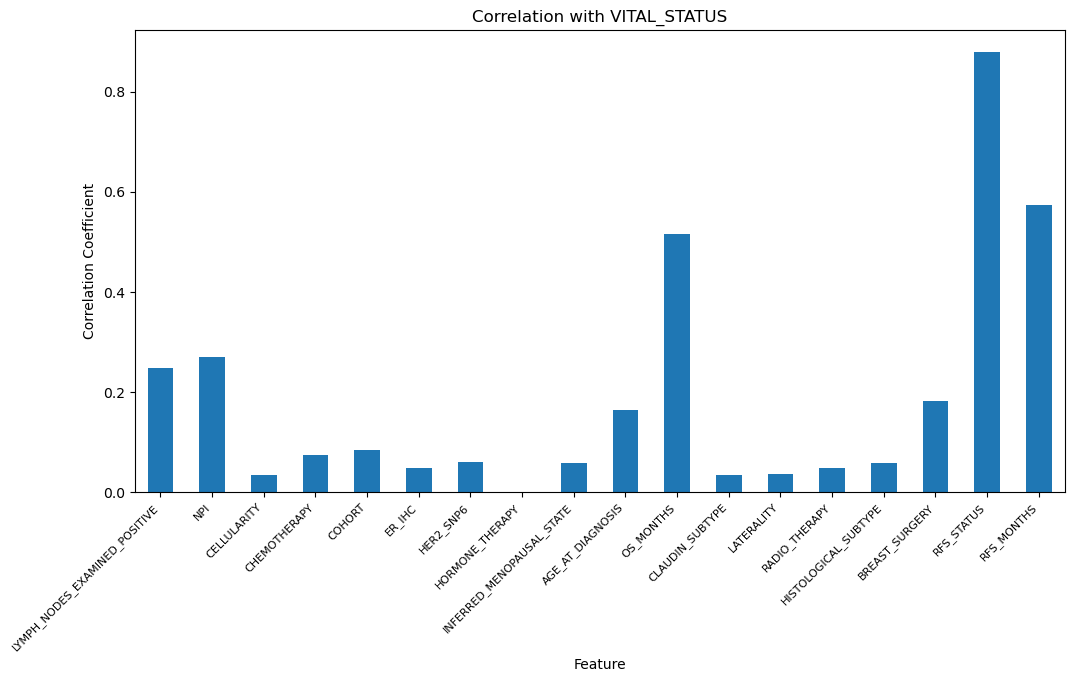

In [34]:
# Calculate the absolute correlation between 
# independent variables (X) and the dependent variable (Y)
abs_correlation_with_y = X.corrwith(Y).abs()
# Create a bar plot to visualize the absolute correlation values
abs_correlation_with_y.plot(kind='bar', figsize=(12, 6))
# Set the title of the plot
plt.title('Correlation with VITAL_STATUS')
# Label the x-axis as 'Feature'
plt.xlabel('Feature')
# Label the y-axis as 'Correlation Coefficient'
plt.ylabel('Correlation Coefficient')
# Rotate x-axis labels and fontsize for better readability
plt.xticks(rotation=45)
plt.xticks(fontsize=8)
plt.xticks(ha='right')
plt.show()

### Exploratory Analysis of Distribution Among Categorical Variables

For the categorical variables, we create pie charts to depict the proportion of the independent attribute that represent each value. These categorical variables include CELLULARITY, CHEMOTHERAPY, COHORT, ER_IHC, HER2_SNP6, HORMONE_THERAPY, INFERRED_MENOPAUSAL_STATE, CLAUDIN_SUBTYPE, LATERALITY, RADIO_THERAPY, HISTOLOGICAL_SUBTYPE, BREAST_SURGERY, RFS_STATUS. Descriptions of each will be given alongside the associated visualization for clarity.

CELLULARITY: First, we create a pie chart to understand the breakdown of Cellularity among patients. Cellularity refers to the density or concentration of tumor cells within a tissue of sample. This dataset classifies them into high, moderate, and low cellularity. The pie chart below shows around half of the patients in the dataset having high cellularity.

Text(0.5, 1.0, 'CELLULARITY')

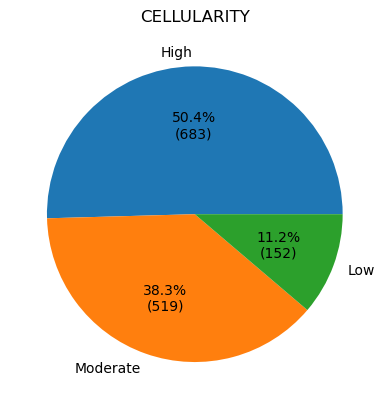

In [35]:
#creates a pie chart representing the Basic analysis of CELLULARITY distributions
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
#Define a mapping from numeric values to descriptive labels
mapp_value= {0:'Low', 1:'Moderate', 2:'High'}
#Count the occurrences of each category
m= X['CELLULARITY'].value_counts()
#Map the numeric index to descriptive labels
m.index=m.index.to_series().map(mapp_value)
#Create a pie chart with labels and custom autopct formatting
plt.pie(m, labels=m.index,autopct=autopct_format(m))
plt.title('CELLULARITY')

CHEMOTHERAPY: We create a pie chart to understand the breakdown of having had chemotherapy among patients. Chemotherapy refers to a medical treatment for cancer, invloving the use of drugs or medication to kill or slow the growth of rapidly dividing cells. This dataset assigns patients a "No" value if they have not had chemotherapy, and a "Yes" value if they have had chemotherapy. The pie chart below shows around 74% of patients in the data set do not have chemotherapy.

Text(0.5, 1.0, 'CHEMOTHERAPY')

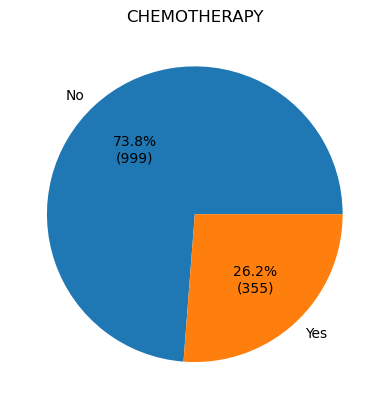

In [36]:
##creates a pie chart representing the Basic analysis of CHEMOTHERAPY distributions
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
#Define a mapping from numeric values to descriptive labels
mapp_value= {0:'No', 1:'Yes'}
#Count the occurrences of each category
m= X['CHEMOTHERAPY'].value_counts()
#Map the numeric index to descriptive labels
m.index=m.index.to_series().map(mapp_value)
#Create a pie chart with labels and custom autopct formatting
plt.pie(m, labels=m.index,autopct=autopct_format(m))
plt.title('CHEMOTHERAPY')

HORMONE_THERAPY: We create a pie chart to understand the distribution of Hormone therapy among patients. Hormone therapy refers to a medical treatment that involves altering the levels or effects of hormones in the body. The dataset gives the value "No" to patients who have not had hormone therapy, and "Yes" to patients that have had hormone therapy. The pie chart below shows that most patients have had hormone therapy (~60%).

Text(0.5, 1.0, 'HORMONE_THERAPY')

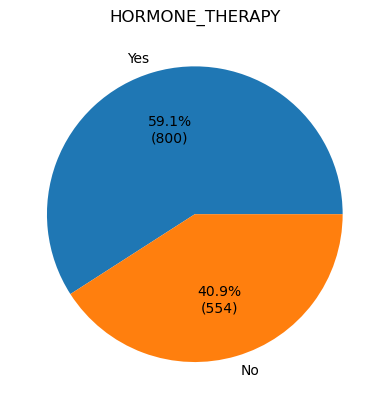

In [37]:
##creates a pie chart representing the analysis of HORMONE_THERAPY distributions
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
#Define a mapping from numeric values to descriptive labels
mapp_value= {0:'No', 1: 'Yes'}
#Count the occurrences of each category
m= X['HORMONE_THERAPY'].value_counts()
#Map the numeric index to descriptive labels
m.index=m.index.to_series().map(mapp_value)
#Create a pie chart with labels and custom autopct formatting
plt.pie(m, labels=m.index,autopct=autopct_format(m))
plt.title('HORMONE_THERAPY')

RADIO_THERAPY: We creat pie charts to determine the distribution of radiotherapy among patients in the data set. Radiotherapy, or radiation therapy, refers to a cancer therapy treatment using ionizing radiation to kill or control the growth of malignant cells. The data classifies patients into "Yes" for having had readiotherapy or "No" for not having had radiotherapy. The pie chart below shows that most patients have had radiotherapy, with 64.1% being labeled "Yes." 

Text(0.5, 1.0, 'RADIO_THERAPY')

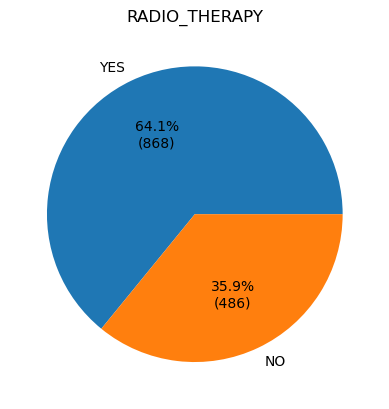

In [38]:
##creates a pie chart representing the analysis of RADIO_THERAPY distributions 
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
#Define a mapping from numeric values to descriptive labels
mapp_value= {1:'YES', 0:'NO'}
#Count the occurrences of each category
m = X['RADIO_THERAPY'].value_counts()
#Map the numeric index to descriptive labels
m.index=m.index.to_series().map(mapp_value)
#Create a pie chart with labels and custom autopct formatting
plt.pie(m, labels=m.index,autopct=autopct_format(m))
plt.title('RADIO_THERAPY')


To look into the central tendency (mean) and variability (standard deviation) of numeric data within a dataset, we perform summary statistics (Mean, Standard Deviation) as they offer insights into the distribution and characteristics of the data, aiding in further analysis and understanding the features' nature within the dataset.

In [39]:
# Calculate mean and standard deviation for numeric columns
numeric_summary = breast_cancer_df.describe()

# Display mean and standard deviation
print("Summary Statistics - Mean:")
print(numeric_summary.loc['mean'])  # Mean
print("\nSummary Statistics - Standard Deviation:")
print(numeric_summary.loc['std'])  # Standard Deviation

Summary Statistics - Mean:
LYMPH_NODES_EXAMINED_POSITIVE      2.038405
NPI                                4.107685
CELLULARITY                        1.392171
CHEMOTHERAPY                       0.262186
COHORT                             2.477105
ER_IHC                             0.741742
HER2_SNP6                          1.180207
HORMONE_THERAPY                    0.590842
INFERRED_MENOPAUSAL_STATE          0.729690
AGE_AT_DIAGNOSIS                  58.396204
OS_MONTHS                        125.780625
OS_STATUS                          0.430576
CLAUDIN_SUBTYPE                    3.150817
VITAL_STATUS                       0.430576
LATERALITY                         0.484490
RADIO_THERAPY                      0.641064
HISTOLOGICAL_SUBTYPE               0.481175
BREAST_SURGERY                     0.573551
RFS_STATUS                         0.494830
RFS_MONTHS                       108.705709
Name: mean, dtype: float64

Summary Statistics - Standard Deviation:
LYMPH_NODES_EXAMINED_POS

To understand the distribution of outcomes within the dataset and the dataset's balance and characteristics, We draw bar graph to compare positive and negative cases in the 'VITAL_STATUS' column which represents whether patients are living (negative case) or have died due to the disease (positive case). Since vital status = 1 means the patient has died of the cancer, the 'Living' category (negative case) vital status = 0 has a higher bar, it indicates that a larger number of patients are currently living.

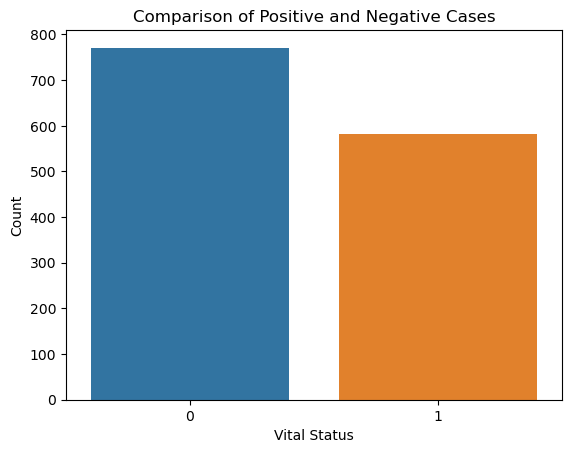

In [40]:
# Create Bar graph to to visualize the distribution of 'VITAL_STATUS' contains positive and negative cases
sns.countplot(x='VITAL_STATUS', data=breast_cancer_df)
plt.xlabel('Vital Status')
plt.ylabel('Count')
plt.title('Comparison of Positive and Negative Cases')
plt.show()

LYMPH_NODES_EXAMINED_POSITIVE: We create a histogram to visualize the distribution of variable 'LYMPH_NODES_EXAMINED_POSITIVE' concerning the 'VITAL_STATUS.' It allows us to see how the frequency or count of different levels of LYMPH_NODES_EXAMINED_POSITIVE varies for patients who are living ('Living') and those who have died due to the disease ('Died of Disease').

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


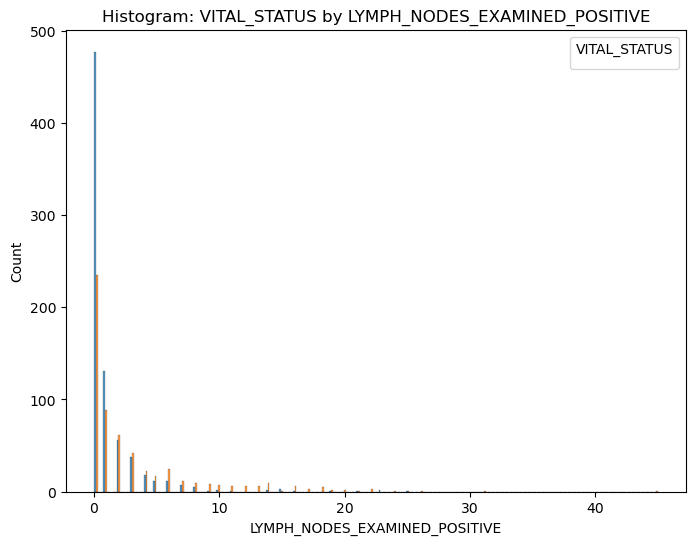

In [41]:

# Histogram comparing 'VITAL_STATUS' counts for a categorical LYMPH_NODES_EXAMINED_POSITIVE
plt.figure(figsize=(8, 6))
sns.histplot(data=breast_cancer_df, x='LYMPH_NODES_EXAMINED_POSITIVE', hue='VITAL_STATUS', multiple='dodge', shrink=0.8)
plt.xlabel('LYMPH_NODES_EXAMINED_POSITIVE')
plt.ylabel('Count')
plt.title('Histogram: VITAL_STATUS by LYMPH_NODES_EXAMINED_POSITIVE')
plt.legend(title='VITAL_STATUS')
plt.show()

CHEMOTHERAPY: We create a histogram to visualize the distribution of another variable 'CHEMOTHERAPY' concerning the 'VITAL_STATUS.' It allows us to see how the frequency or count of different levels of CHEMOTHERAPY varies for patients who are living ('Living') and those who have died due to the disease ('Died of Disease').

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


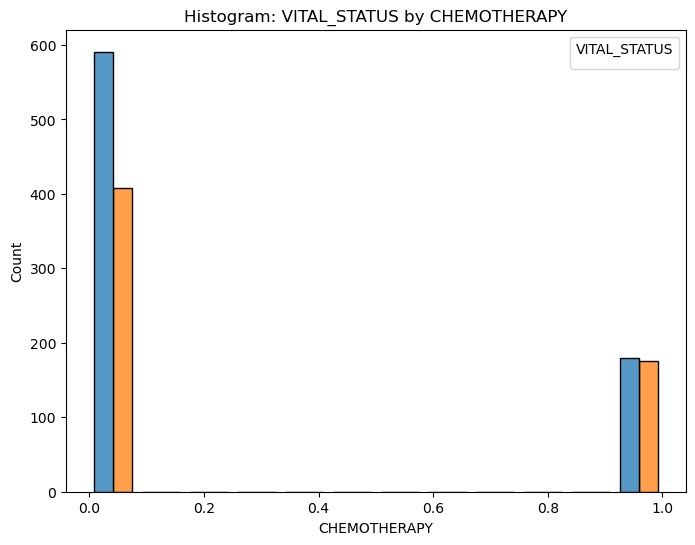

In [42]:
# Histogram comparing 'VITAL_STATUS' counts for a categorical 'CHEMOTHERAPY'
plt.figure(figsize=(8, 6))
sns.histplot(data=breast_cancer_df, x='CHEMOTHERAPY', hue='VITAL_STATUS', multiple='dodge', shrink=0.8)
plt.xlabel('CHEMOTHERAPY')
plt.ylabel('Count')
plt.title('Histogram: VITAL_STATUS by CHEMOTHERAPY')
plt.legend(title='VITAL_STATUS')
plt.show()

HORMONE_THERAPY: We also create a histogram to visualize the distribution of another variable 'HORMONE_THERAPY' concerning the 'VITAL_STATUS.' It allows us to see how the frequency or count of different levels of HORMONE_THERAPY varies for patients who are living ('Living') and those who have died due to the disease ('Died of Disease').

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


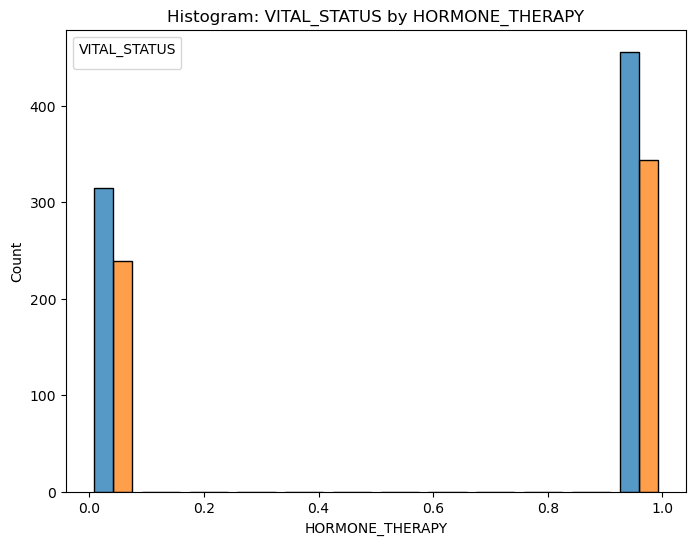

In [49]:
# Histogram comparing 'VITAL_STATUS' counts for a categorical 'HORMONE_THERAPY'
plt.figure(figsize=(8, 6))
sns.histplot(data=breast_cancer_df, x='HORMONE_THERAPY', hue='VITAL_STATUS', multiple='dodge', shrink=0.8)
plt.xlabel('HORMONE_THERAPY')
plt.ylabel('Count')
plt.title('Histogram: VITAL_STATUS by HORMONE_THERAPY')
plt.legend(title='VITAL_STATUS')
plt.show()

### Exploratory Analysis Comparing Distribution of Numerical Variables Between Two States of VITAL_STATUS

Create boxplots for the numerical independent variables, LYMPH_NODES_EXAMINED_POSITIVE, NPI, AGE_AT_DIAGNOSIS, OS_MONTHS, RFS_MONTHS, based on the binary dependent variable, vitality of a patient. This will help us assess the distribution of input variables based on whether the patient is living or died of disease.
First, we create a function that draws boxplots representing the the numerical independent variable as a function of the binary dependent variable.

In [43]:
#Create boxplots to visualize the distribution of an independent variable 
#according to a dependent variable.
def indep_by_dep_boxplot(df,independent,dependent):
    '''
    Param df: dataframe containing both the dependent and independent columns
    Param dependent: column which serves as the dependent variable
    Param independent: column which serves as the independent variable 
    which is plotted according the independent column.
    '''

    print('\n Distribution of {} according to {}'.format(independent,dependent)+':\n')

    #Define colors for the boxplots
    colors=['blue','grey']

    #Get unique values of the dependent variable
    criteria=[i for i in df[dependent].sort_values(ascending=True).dropna().unique()]

    #Calculate the number of unique criteria
    col_count=len(criteria)
    
    #Create a melted table for visualization
    table=df.melt(id_vars=[dependent],value_vars=[independent]).dropna()

    #Create subplots to display boxplots
    fig,ax=plt.subplots(nrows=1,ncols=col_count,figsize=(6,5))
    for i in range(0,col_count):
        sns.boxplot(data=table.where(table[dependent]
                                     ==criteria[i]).value,ax=ax[i],color=colors[i])
        ax[i].set_title(dependent + ' = ' + str(criteria[i]))
        plt.tight_layout()

    #Display the boxplots
    plt.show()

LYMPH_NODES_EXAMINED_POSITIVE: We create two boxplots comparing the distribution of lymph_nodes_exampined_positive between patients that are alive versus patients that have died of cancer. This variable refers to the number of lymph nodes in which cancer cells are detected. Since vital status = 1 means the patient has died of the cancer, it appears below that patients who have passed have more lypmph nodes positive with cancer cells on average, but the range is also larger.


 Distribution of LYMPH_NODES_EXAMINED_POSITIVE according to VITAL_STATUS:



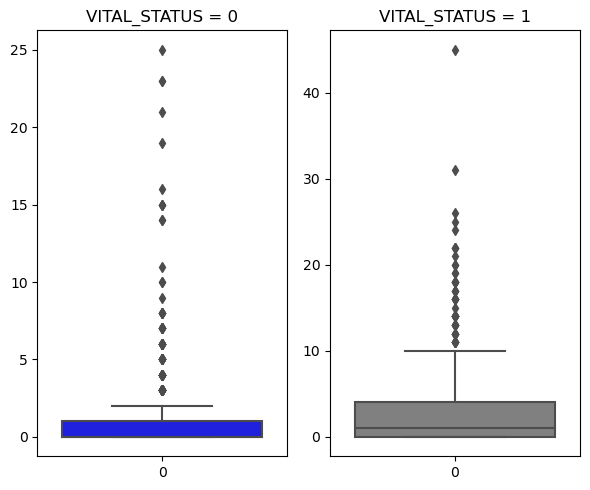

In [44]:
#LYMPH_NODES_EXAMINED_POSITIVE based on binary classification of VITAL_STATUS
lymph_vitality_df = breast_cancer_df[
    ['LYMPH_NODES_EXAMINED_POSITIVE','VITAL_STATUS']].copy()
indep_by_dep_boxplot(lymph_vitality_df,'LYMPH_NODES_EXAMINED_POSITIVE','VITAL_STATUS')

NPI: We create two boxplots comparing the distribution of NPI between patients that are alive versus patients that have died of cancer. This variable refers to Nottingham Prognostic index, which is a prognostics measure that predicts operable primary breast cancer survival. Based on these, it appears that the average NPI score between living and passed patients do not differ significantly, although the range in NPI scores for patients that have passed is more consistently on the higher end.


 Distribution of NPI according to VITAL_STATUS:



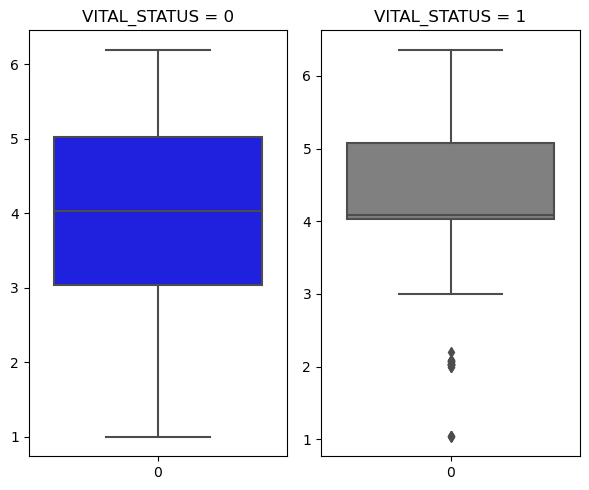

In [45]:
#NPI based on binary classification of VITAL_STATUS
npi_df= breast_cancer_df[['NPI','VITAL_STATUS']].copy()
indep_by_dep_boxplot(npi_df,'NPI','VITAL_STATUS')

AGE_AT_DIAGNOSIS: We create two boxplots comparing the distribution of age of diagnosis between patients that are alive and patients that have died of cancer. It seems the average age of diagnosis for patients who have passed is slightly higher, but it's difficult to say if this is significant. The range of ages for patients who have passed, however, seems to be much more spread apart.


 Distribution of AGE_AT_DIAGNOSIS according to VITAL_STATUS:



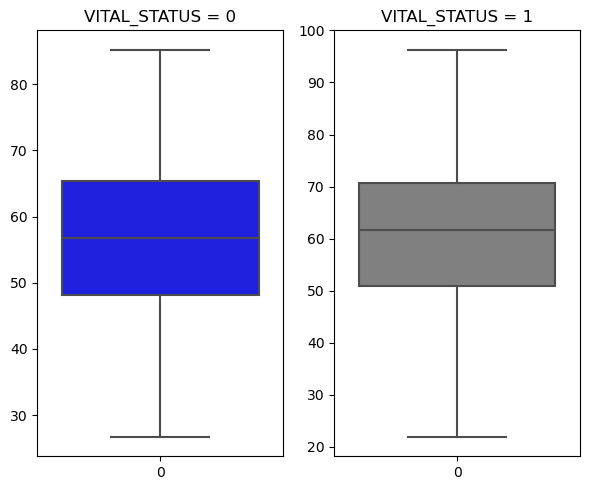

In [46]:
#AGE_AT_DIAGNOSIS based on binary classification of VITAL_STATUS
age_df= breast_cancer_df[['AGE_AT_DIAGNOSIS','VITAL_STATUS']].copy()
indep_by_dep_boxplot(age_df,'AGE_AT_DIAGNOSIS','VITAL_STATUS')

OS_MONTHS: We create two boxplots comparing the distribution of OS Months between patients that are alive and patients that have died of cancer. This variable refers to overall survival in months since initial diagnosis. As such, this value for patients who have passed are much lower. This is not very insightful, however, given the obvious correlation between current state of vitality and number of survival months.


 Distribution of OS_MONTHS according to VITAL_STATUS:



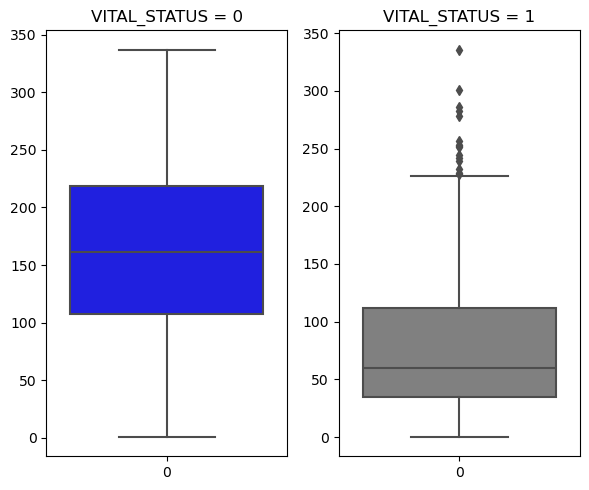

In [47]:
#OS_MONTHS based on binary classification of VITAL_STATUS
os_months_df= breast_cancer_df[['OS_MONTHS','VITAL_STATUS']].copy()
indep_by_dep_boxplot(os_months_df,'OS_MONTHS','VITAL_STATUS')

RFS_STATUS: We create two boxplots comparing the distribution of RFS Status between patients that are alive and patients that have died of cancer. This variable refers to relapse free status in months. Patients that have passed have a much shorter time of being relapse free.


 Distribution of RFS_MONTHS according to VITAL_STATUS:



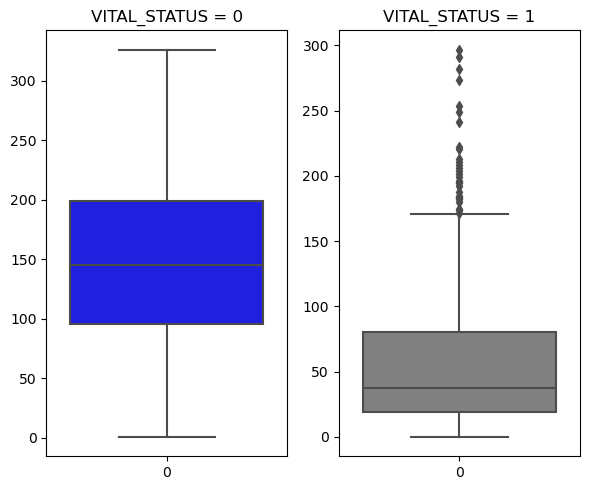

In [48]:
#RFS_MONTHS based on binary classification of VITAL_STATUS
rfs_months_df= breast_cancer_df[['RFS_MONTHS','VITAL_STATUS']].copy()
indep_by_dep_boxplot(rfs_months_df,'RFS_MONTHS','VITAL_STATUS')